# Exploración y Análisis de Datos (EDA)

[![Banner.png](https://i.postimg.cc/C1t2SCwf/Banner.png)](https://postimg.cc/FdypxLd9)

## Introducción

Este notebook se centra en el análisis exploratorio de datos (EDA) para comprender mejor las características de las transacciones financieras y detectar patrones relacionados con el fraude. Las tareas principales incluyen:

**Exploración descriptiva:** Examinar las características de los datos, como la distribución de variables, relaciones entre variables y valores atípicos.

**Visualización de datos:** Crear gráficos y tablas para visualizar la distribución de los datos, identificar patrones y tendencias, y destacar posibles indicadores de fraude.

**Análisis de correlación:** Evaluaremos la relación entre variables para comprender cómo se asocian los diferentes factores con el fraude.

**Identificación de características relevantes:** Seleccionar las variables más importantes para el análisis posterior, como el monto de la transacción, el método de pago y la ubicación del cliente.
Objetivos:

Obtener una comprensión profunda de las características de las transacciones financieras.
Identificar patrones y tendencias que puedan indicar actividades fraudulentas.
Seleccionar las variables más relevantes para la construcción de modelos de predicción de fraude.


In [ ]:
# Instalo bibliotecas
%pip install prophet
%pip install --upgrade jupyter ipywidgets
%pip install tqdm fbprophet
%pip install plotly
%pip install pandas requests
%pip install tabulate
%pip install geopy
%pip install wordcloud

In [24]:
# Importo librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import random
import time
import pandas as pd
import requests
import time
import json
import matplotlib.pyplot as plt
import tqdm
import os

from time import sleep
from tqdm import tqdm
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from prophet import Prophet

In [3]:
# Cargo el DataFrame guardado para leerlo
file_path = r"C:\Users\Esteban García\OneDrive\Escritorio\LABs\Carpeta Fraude\DF guardado\ecommerce.csv"
ecommerce = pd.read_csv(file_path)

In [4]:
"""visualizo el df para tener un primer acercamiento"""
ecommerce

,Transaction ID,Customer ID,Transaction Amount,Transaction Day,Transaction Hour,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,20-02-2024,05:58:41,Bank Transfer,Electronics,1,17,Amandaborough,Tablet,212.195.49.198,Unit 8934 Box 0058\nDpo Aa 05437,Unit 8934 Box 0058\nDpo Aa 05437,0,30
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,25-02-2024,08:09:45,Debit Card,Electronics,2,40,East Timothy,Desktop,208.106.249.121,"634 May Keys\nPort Cherylview, Nv 75063","634 May Keys\nPort Cherylview, Nv 75063",0,72
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,18-03-2024,03:42:55,Paypal,Home & Garden,2,22,Davismouth,Tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, Il 15564","16282 Dana Falls Suite 790\nRothhaven, Il 15564",0,63
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,16-03-2024,20:41:31,Bank Transfer,Clothing,5,31,Lynnberg,Desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, Ut 84798","828 Strong Loaf Apt. 646\nNew Joshua, Ut 84798",0,124
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,15-01-2024,05:08:17,Bank Transfer,Clothing,2,51,South Nicole,Tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472689,c8604004-2f4c-42ce-a1c4-cd2bebca79bb,f8a534ad-0458-465e-a85b-3ad2cdf391bc,208.48,12-01-2024,23:39:55,Paypal,Health & Beauty,2,29,North Laurafort,Desktop,27.245.104.92,Usnv Griffin\nFpo Aa 52700,Usnv Griffin\nFpo Aa 52700,0,149
1472690,fff0df19-fd4a-42a5-bc42-64bb7b02edb0,f2ef2239-d9b9-40d0-9993-4b8f305d5a7b,231.57,27-03-2024,04:31:45,Credit Card,Clothing,2,32,Burnsville,Tablet,203.54.50.163,"478 John Square Apt. 235\nMillerhaven, Ga 68797","478 John Square Apt. 235\nMillerhaven, Ga 68797",0,132
1472691,9e79012f-e00b-47d1-8700-0c302db20d3e,fa5b9a25-9606-478a-8abe-ef20bbb3980f,101.80,31-01-2024,23:51:42,Bank Transfer,Electronics,4,36,Garciafort,Mobile,51.241.30.149,"351 Frazier Radial Apt. 989\nPort Charles, Oh ...","182 House Island Suite 198\nEast Scott, Fm 84301",0,98
1472692,917066b1-4dfb-4472-b3f0-292663c45d21,04524272-e14f-460b-bc70-5316bd28463d,61.80,12-01-2024,16:21:32,Bank Transfer,Electronics,5,34,Lake Josephberg,Desktop,210.67.203.4,"27307 Gonzalez Shore Suite 661\nPort Lynn, Wv ...","27307 Gonzalez Shore Suite 661\nPort Lynn, Wv ...",0,191


### Hago una limpieza

In [7]:
# IHabilito tqdm para su uso con pandas
from tqdm import tqdm
tqdm.pandas()

# Visualizo las primeras filas del dataframe
ecommerce.head()

# Reviso datos faltantes
ecommerce.isnull().sum()

# Elimino filas con datos faltantes con tqdm
ecommerce.dropna(inplace=True)
ecommerce.progress_apply(lambda x: x)

# Verificación final
ecommerce.isnull().sum()

100%|██████████| 16/16 [00:01<00:00, 12.10it/s]


Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Day       0
Transaction Hour      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
dtype: int64

### Comienzo con el análisis exploratorio EDA

In [8]:
"""pretendo visualizar todas las columnas"""
print(ecommerce.columns)

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Day', 'Transaction Hour', 'Payment Method',
       'Product Category', 'Quantity', 'Customer Age', 'Customer Location',
       'Device Used', 'IP Address', 'Shipping Address', 'Billing Address',
       'Is Fraudulent', 'Account Age Days'],
      dtype='object')


In [9]:
"""busco ver la dimensión del df"""
print(len(ecommerce))

1472694


In [10]:
"""verifico el tipo de dato"""
print(ecommerce.dtypes)


Transaction ID         object
Customer ID            object
Transaction Amount    float64
Transaction Day        object
Transaction Hour       object
Payment Method         object
Product Category       object
Quantity                int64
Customer Age            int64
Customer Location      object
Device Used            object
IP Address             object
Shipping Address       object
Billing Address        object
Is Fraudulent           int64
Account Age Days        int64
dtype: object


In [11]:
"""en esta etapa trato de ver en detalle el contenido sin profundizar"""
print(ecommerce.head())


                         Transaction ID                           Customer ID  \
0  15d2e414-8735-46fc-9e02-80b472b2580f  d1b87f62-51b2-493b-ad6a-77e0fe13e785   
1  0bfee1a0-6d5e-40da-a446-d04e73b1b177  37de64d5-e901-4a56-9ea0-af0c24c069cf   
2  e588eef4-b754-468e-9d90-d0e0abfc1af0  1bac88d6-4b22-409a-a06b-425119c57225   
3  4de46e52-60c3-49d9-be39-636681009789  2357c76e-9253-4ceb-b44e-ef4b71cb7d4d   
4  074a76de-fe2d-443e-a00c-f044cdb68e21  45071bc5-9588-43ea-8093-023caec8ea1c   

   Transaction Amount Transaction Day Transaction Hour Payment Method  \
0               58.09      20-02-2024         05:58:41  Bank Transfer   
1              389.96      25-02-2024         08:09:45     Debit Card   
2              134.19      18-03-2024         03:42:55         Paypal   
3              226.17      16-03-2024         20:41:31  Bank Transfer   
4              121.53      15-01-2024         05:08:17  Bank Transfer   

  Product Category  Quantity  Customer Age Customer Location Device Used  

In [12]:
"""visualizo en este primer asercamiento un resumen estadístico"""
print(ecommerce.describe())

       Transaction Amount      Quantity  Customer Age  Is Fraudulent  \
count        1.472694e+06  1.472694e+06  1.472694e+06   1.472694e+06   
mean         2.267695e+02  3.000225e+00  3.451868e+01   5.012990e-02   
std          2.704015e+02  1.414733e+00  9.991539e+00   2.182130e-01   
min          1.000000e+01  1.000000e+00  0.000000e+00   0.000000e+00   
25%          6.861000e+01  2.000000e+00  2.800000e+01   0.000000e+00   
50%          1.517600e+02  3.000000e+00  3.500000e+01   0.000000e+00   
75%          2.960500e+02  4.000000e+00  4.100000e+01   0.000000e+00   
max          1.270175e+04  5.000000e+00  8.600000e+01   1.000000e+00   

       Account Age Days  
count      1.472694e+06  
mean       1.796454e+02  
std        1.068642e+02  
min        1.000000e+00  
25%        8.600000e+01  
50%        1.790000e+02  
75%        2.720000e+02  
max        3.650000e+02  


In [13]:
"""analizo el periodo del df"""
ecommerce['Transaction Day'] = pd.to_datetime(ecommerce['Transaction Day'], format='%d-%m-%Y')

# Obtengo la fecha inicial y final
fecha_inicial = ecommerce['Transaction Day'].min()
fecha_final = ecommerce['Transaction Day'].max()

print(f"Fecha inicial: {fecha_inicial}")
print(f"Fecha final: {fecha_final}")


Fecha inicial: 2024-01-01 00:00:00
Fecha final: 2024-04-03 00:00:00


,Transaction Amount,Transaction Day,Quantity,Customer Age,Is Fraudulent,Account Age Days
count,1.472694e+06,1472694,1.472694e+06,1.472694e+06,1.472694e+06,1.472694e+06
mean,2.267695e+02,2024-02-16 04:08:16.565885952,3.000225e+00,3.451868e+01,5.012990e-02,1.796454e+02
min,1.000000e+01,2024-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,6.861000e+01,2024-01-24 00:00:00,2.000000e+00,2.800000e+01,0.000000e+00,8.600000e+01
50%,1.517600e+02,2024-02-16 00:00:00,3.000000e+00,3.500000e+01,0.000000e+00,1.790000e+02
75%,2.960500e+02,2024-03-10 00:00:00,4.000000e+00,4.100000e+01,0.000000e+00,2.720000e+02
max,1.270175e+04,2024-04-03 00:00:00,5.000000e+00,8.600000e+01,1.000000e+00,3.650000e+02
std,2.704015e+02,NaN,1.414733e+00,9.991539e+00,2.182130e-01,1.068642e+02


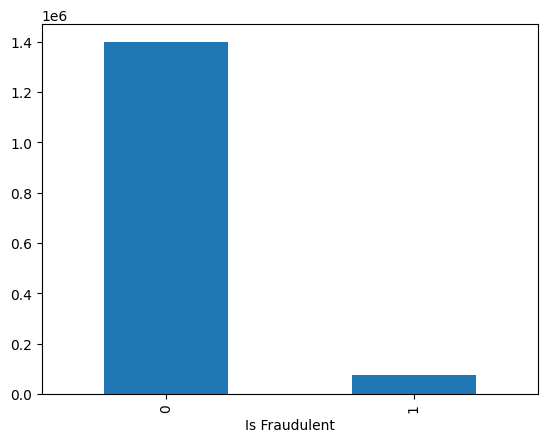

In [14]:
# Distribución de la variable objetivo
ecommerce['Is Fraudulent'].value_counts().plot(kind='bar')

# Descripción estadística de las variables numéricas
ecommerce.describe()


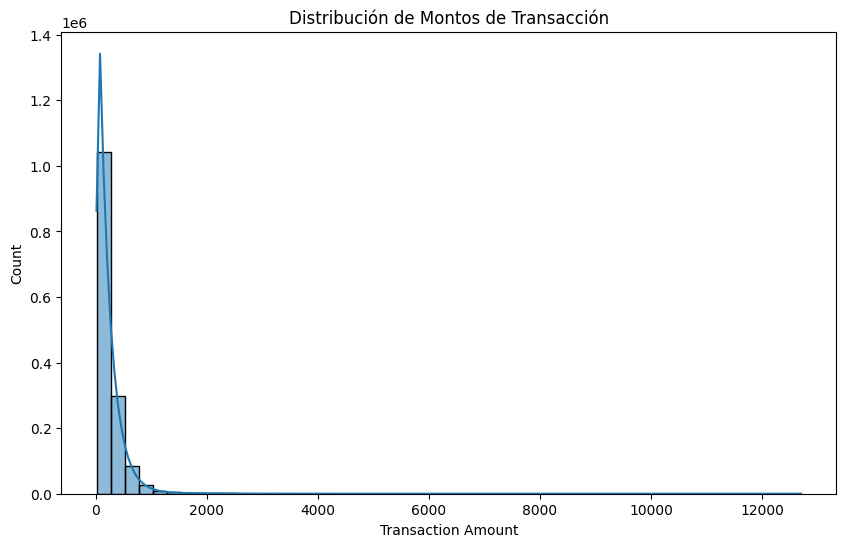

In [16]:
# Distribución de datos
plt.figure(figsize=(10, 6))
sns.histplot(ecommerce['Transaction Amount'], bins=50, kde=True)
plt.title('Distribución de Montos de Transacción')
plt.show()

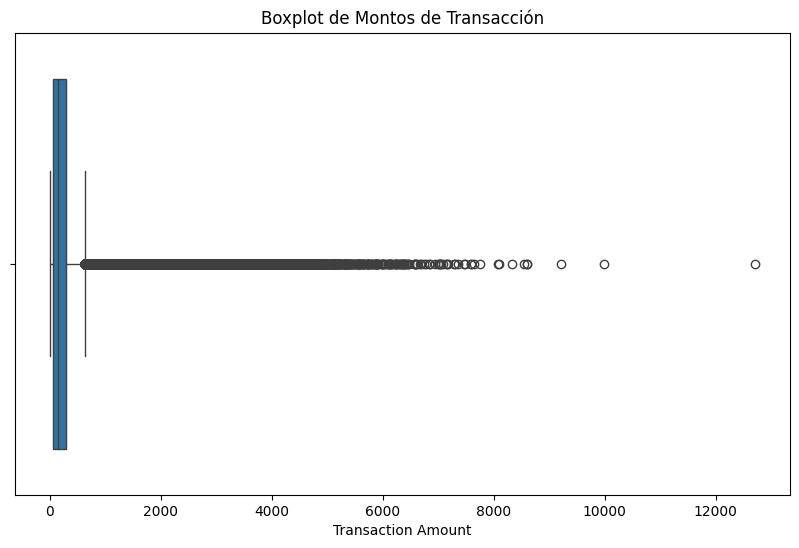

In [17]:
# Detección de valores atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(x=ecommerce['Transaction Amount'])
plt.title('Boxplot de Montos de Transacción')
plt.show()

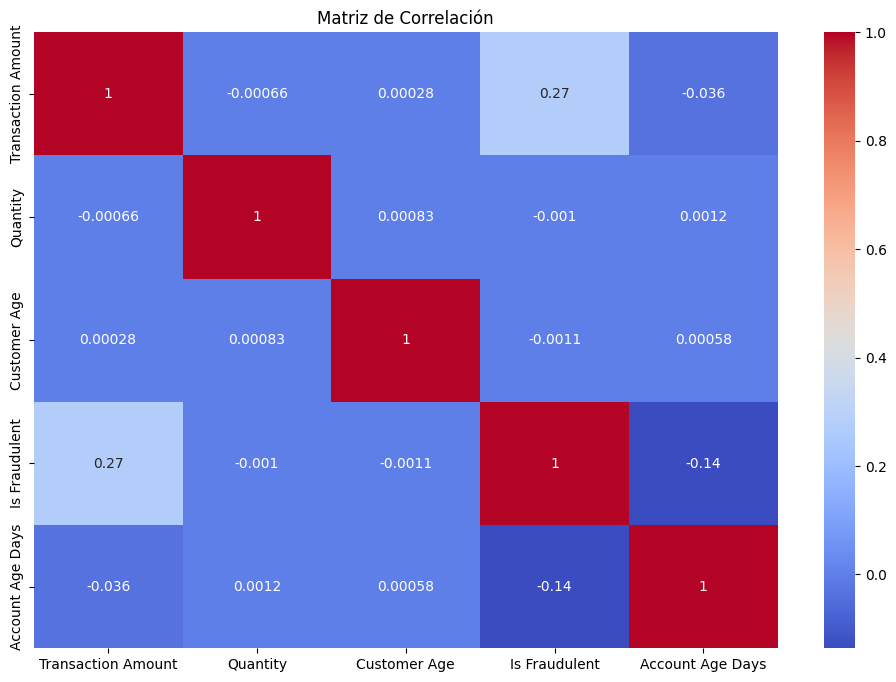

In [18]:
"""Correlación entre variables"""

# Selecciono solo las columnas numéricas
numeric_df = ecommerce.select_dtypes(include=['number'])

# Calculo la matriz de correlación
correlation_matrix = numeric_df.corr()

# Visualizo la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


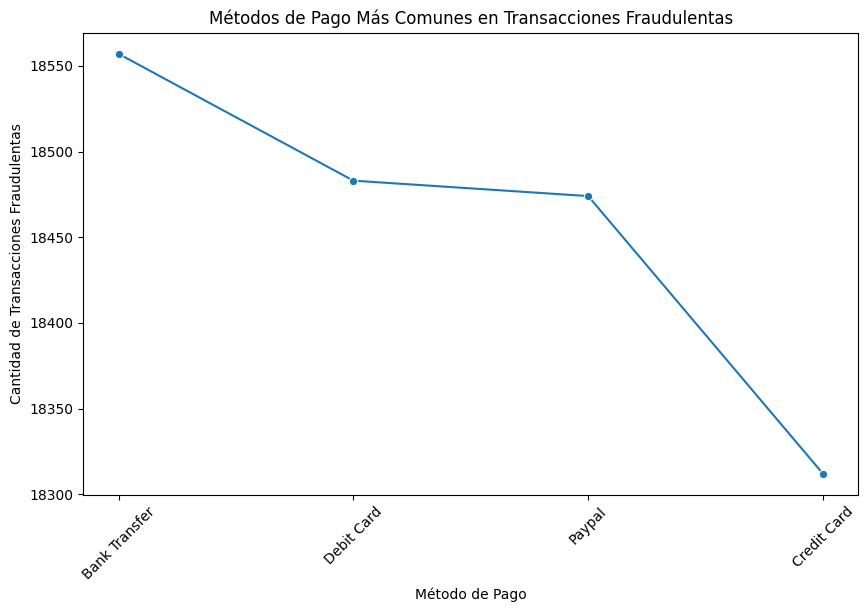

In [19]:
"""identifico los métodos de pago que están más asociados con las transacciones fraudulentas"""

# Filtro las transacciones fraudulentas
fraudulent_transactions = ecommerce[ecommerce['Is Fraudulent'] == 1]

# Cuento la frecuencia de cada método de pago en transacciones fraudulentas
payment_method_counts = fraudulent_transactions['Payment Method'].value_counts()

"""vamos a graficar la información con un gráfico de líneas
ya que la visualización es más amena y puede mostrar tendencias y variaciones"""

# Creo un gráfico de línea con marcadores
plt.figure(figsize=(10, 6))
sns.lineplot(x=payment_method_counts.index, y=payment_method_counts.values, marker='o')
plt.title('Métodos de Pago Más Comunes en Transacciones Fraudulentas')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Transacciones Fraudulentas')
plt.xticks(rotation=45)
plt.show()

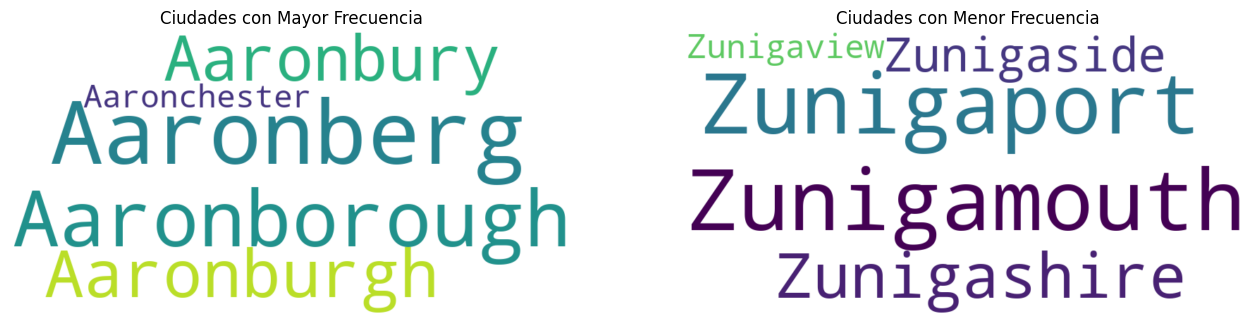

In [27]:
"""visualizaremos con una nube de palabras
las ciudades con más fraudes y a la derecha 
del mismo las ciudades con menor cantidad de fraudes"""

# Obtener las 5 ciudades más y menos frecuentes, con al menos 5 apariciones
all_transactions = ecommerce.copy()  # Creamos una copia para no modificar el original
all_transactions['count'] = 1  # Añadimos una columna con valor 1 para conteo

# Contamos las apariciones por ciudad
city_counts = all_transactions.groupby('Customer Location')['count'].sum()

# Filtro para mostrar solo ciudades con más de 5 apariciones
top_cities = city_counts[city_counts > 5].head(5)
bottom_cities = city_counts[city_counts > 5].tail(5)  # Ocupa las últimas 5 del total filtrado

# Convierto las Series en strings para crear las nubes de palabras
fraud_text = ' '.join(top_cities.index)
non_fraud_text = ' '.join(bottom_cities.index)  # Usamos bottom_cities para las menos frecuentes

# Creo las nubes de palabras
wordcloud_fraud = WordCloud(width=800, height=400, background_color='white').generate(fraud_text)
wordcloud_non_fraud = WordCloud(width=800, height=400, background_color='white').generate(non_fraud_text)

# Visualizo las nubes de palabras
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_fraud, interpolation='bilinear')
plt.axis("off")
plt.title("Ciudades con Mayor Frecuencia")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_fraud, interpolation='bilinear')
plt.axis("off")
plt.title("Ciudades con Menor Frecuencia")

plt.show()

In [ ]:
"""creo el gráfico de Scatter Plot"""

# Creo el scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Is Fraudulent', data=ecommerce)
plt.title('Distribución Geográfica de Transacciones')
plt.show()


In [ ]:
"""
Análisis geográfico el cual usaré folium para crear mapas interactivos,
usaremos coordenadas falsas provisoriamente para deducir los datos después de
"""
# Genero coordenadas aleatorias para el ejemplo
np.random.seed(42)  # Para reproducibilidad
ecommerce['Longitude'] = np.random.uniform(-180, 180, ecommerce.shape[0])
ecommerce['Latitude'] = np.random.uniform(-90, 90, ecommerce.shape[0])

# Ahora creo el scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Is Fraudulent', data=ecommerce)
plt.title('Distribución Geográfica de Transacciones')
plt.show()

In [ ]:
# Temporalidad de las transacciones
ecommerce['Transaction Hour'] = pd.to_datetime(ecommerce['Transaction Hour'], format='%H:%M:%S').dt.hour
plt.figure(figsize=(10, 6))
sns.countplot(x='Transaction Hour', data=ecommerce)
plt.title('Distribución Horaria de Transacciones')
plt.show()

In [ ]:
# Visualización de fraudes
plt.figure(figsize=(10, 6))
sns.countplot(x='Is Fraudulent', data=ecommerce)
plt.title('Proporción de Transacciones Fraudulentas')
plt.show()

In [ ]:
# Segmentación de clientes (ejemplo simple)
plt.figure(figsize=(10, 6))
sns.histplot(ecommerce['Customer Age'], bins=30, kde=True)
plt.title('Distribución de Edad de los Clientes')
plt.show()

### Determinamos el MVP

In [ ]:
"""
Vamos a proceder a crear e integrar predicciones y proyecciones para que pueda ser utilizado por la StarTup para detectar posibles Fraudes
para el periodo 2025, y desarrollaremos un preprocesamiento
"""
# Convierto la columna 'Transaction Day' a formato fecha, manejando errores
try:
  ecommerce['Transaction Day'] = pd.to_datetime(ecommerce['Transaction Day'], format='%Y-%m-%d', errors='coerce')
except ValueError:
  print("Error al convertir la columna 'Transaction Day'. Revisa los formatos de fecha.")

# Identifico y manejar valores faltantes
ecommerce.fillna(method='ffill', inplace=True)  # Rellenar valores faltantes hacia adelante (ajusta según tu caso)

# Creo nuevas características basadas en la fecha
ecommerce['Year'] = ecommerce['Transaction Day'].dt.year
ecommerce['Month'] = ecommerce['Transaction Day'].dt.month
ecommerce['Day'] = ecommerce['Transaction Day'].dt.day
ecommerce['DayOfWeek'] = ecommerce['Transaction Day'].dt.dayofweek

# Divido los datos en entrenamiento y prueba
X = ecommerce.drop(['Is Fraudulent', 'Transaction Day'], axis=1)
y = ecommerce['Is Fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entreno el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluo el modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


In [ ]:
"""
ahora realizaremos una proyección de Fraudes con Prophet
"""
# Preparo los datos para Prophet
df_prophet = ecommerce[['Transaction Day', 'Is Fraudulent']]
df_prophet = df_prophet.rename(columns={'Transaction Day': 'ds', 'Is Fraudulent': 'y'})

# Entreno el modelo Prophet
m = Prophet()
m.fit(df_prophet)

# Creo un dataframe para futuras predicciones
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

# Visualizo las predicciones
fig = m.plot(forecast)
fig.show()

# Proyección de fraudes para 2025
forecast_2025 = forecast[forecast['ds'].dt.year == 2025]
print(forecast_2025[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

